# Cp 2 Financial Data Structures

- How to work with unstructured financial data?


### the four essential types of Financial data

- fundamental data  ex) assets, liabilities, sales, cost/earnings, macro variables  
- Market data ex) volatility, volume...   
- Analytics ex) news sentiment, earning expectations..  
- Alternative data ex) google searches,metadata    

## 2.3.1.2~4 Bars 

data representation that contains the most aseic info about price movements of a financial assets.


## Standard bars

- time bars : obtained by sampling info at fixed time intervals: should be avoided(since it is different from the real market)
time bars oversample inf during low-activity periods and undersample info during high-activity periods.
- tick bars
- volume bars: sampling every time a pre-defined amount of the security's units(shars, futures contracts,etc.) have been exchanged.
- dollar bars : formed by sampling an observation every time a pre-defined market value is exchanged.



In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
import time
import scipy.stats as stats
import math
from tqdm import tqdm_notebook
import sys
from termcolor import colored, cprint

import statsmodels.api



In [20]:
data = pd.read_csv('C:/Python/data/test.csv')

In [21]:
data.head()


,date_time,price,volume,buy,sell
0,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0
1,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0
2,2018-11-21 09:00:00,266.250000,21.0,21.0,0.0
3,2018-11-21 09:00:00,266.299988,1.0,1.0,0.0
4,2018-11-21 09:00:00,266.350006,2.0,2.0,0.0


## Time bars
obtained by sampling info at fixed time intervals: should be avoided
- markets do not proceed information at a constant time interval
- time-sampled series often exhibit poor statistical properties  
time bars oversample info during low-activity periods and undersample info during high-activity periods.

In [22]:
#그냥 전체를 일정 시간 간격으로 쪼개기

# volume weighted avg price
def compute_vwap(df):
    q = df['volume']
    p = df['price']
    vwap = np.sum(p*q)/np.sum(q)
    df['vwap'] = vwap
    return df


data['date_time'] =pd.to_datetime(data['date_time']) #change into datetime format
def time_bars(data):
    data_timeidx = data.set_index('date_time')
    data_time_group = data_timeidx.resample('10T').ohlc()
    n_time_bars = len(data_time_group)
    #data_timeidx.resample('10T').ohlc()
    return data

In [23]:
data_timeidx = data.set_index('date_time')
data_time_group = data_timeidx.resample('10T').ohlc()
n_time_bars = len(data_time_group)
data_time_group.head()

price                                     volume  \
                           open        high         low       close   open   
date_time                                                                    
2018-11-21 09:00:00  266.200012  266.649994  265.500000  266.350006    1.0   
2018-11-21 09:10:00  266.350006  266.450012  265.750000  266.350006    3.0   
2018-11-21 09:20:00  266.350006  266.450012  265.899994  266.049988    1.0   
2018-11-21 09:30:00  266.049988  266.200012  265.850006  265.899994    1.0   
2018-11-21 09:40:00  265.899994  265.899994  265.500000  265.700012    1.0   

                                       buy                   sell              \
                      high  low close open   high  low close open   high  low   
date_time                                                                       
2018-11-21 09:00:00  200.0  1.0  13.0  0.0  200.0  0.0  13.0  1.0  158.0  0.0   
2018-11-21 09:10:00  139.0  1.0   1.0  3.0  111.0  0.0   1.0  0.0  139.0  0.0   
2018-11-21 09:20:00  155.0  1.0   1.0  1.0  100.0  0.0   0.0  0.0  155.0  0.0   
2018-11-21 09:30:00  125.0  1.0   1.0  0.0   80.0  0.0   0.0  1.0  125.0  0.0   
2018-11-21 09:40:00  114.0  1.0   1.0  0.0   89.0  0.0   0.0  1.0  114.0  0.0   

                           
                    close  
date_time                  
2018-11-21 09:00:00   0.0  
2018-11-21 09:10:00   0.0  
2018-11-21 09:20:00   1.0  
2018-11-21 09:30:00   1.0  
2018-11-21 09:40:00   1.0

## Tick bars


sample observations every N trainsactions,aka "ticks', instead of fixed time buckets.  
this allows us to capture more information at times when many trades take place, and vice-versa



In [6]:
def tick_bars(data):
    ticks = len(data)
    num_ticks_per_bar = ticks/n_time_bars
    num_ticks_per_bar = round(num_ticks_per_bar, -2)
    data_tick_grp = data.reset_index().assign(grpId = lambda row:row.index // num_ticks_per_bar)
    data_tick_vwap = data_tick_grp.groupby('grpId').apply(compute_vwap)
    data_tick_vwap.set_index('date_time')
    
    n_tick_idx = len(data_tick_grp)
    return data




In [7]:
tick_bars(data).head()

,date_time,price,volume,buy,sell
0,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0
1,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0
2,2018-11-21 09:00:00,266.250000,21.0,21.0,0.0
3,2018-11-21 09:00:00,266.299988,1.0,1.0,0.0
4,2018-11-21 09:00:00,266.350006,2.0,2.0,0.0


In [8]:
ticks = len(data)
num_ticks_per_bar = ticks/n_time_bars
num_ticks_per_bar = round(num_ticks_per_bar, -2)
data_tick_grp = data.reset_index().assign(grpId = lambda row:row.index // num_ticks_per_bar)
data_tick_vwap = data_tick_grp.groupby('grpId').apply(compute_vwap)
data_tick_vwap.set_index('date_time')
    
n_tick_idx = len(data_tick_grp)


In [9]:
data_drp = data_tick_vwap.drop_duplicates(['grpId'],keep = 'last')
data_drp['price'].pct_change().autocorr()

-0.0069020611673073695

In [10]:
len(data_drp) #number of tick bars

26284

## Volume bars

one shortcoming of tick bars is that not all trades are equal. volume bars circumvent that problem by sampling every time a pre-defined amount of the security's units have been exchanged.

In [10]:
# sample observations for every N contracts exchanged independent of how many trads took place.
def volume_bars(data):
    data['CumVol'] =data['volume'].cumsum()
    total_vol = data['CumVol'].values[-1] # data in the last row 
    vol_per_bar = total_vol/n_time_bars
    vol_per_bar = round(vol_per_bar , -2)
    data_vol_grp = pd.DataFrame(data['CumVol']).assign(grpId = lambda row:row.CumVol // vol_per_bar)
    data_vol_grp = pd.merge(data,data_vol_grp)
    data_vol_vwap = data_vol_grp.groupby('grpId').apply(compute_vwap)
    data_vol_vwap.set_index('date_time')
    return  data
    #set the relevant group for each row


In [11]:
data['CumVol'] =data['volume'].cumsum()
total_vol = data['CumVol'].values[-1] # data in the last row 
vol_per_bar = total_vol/n_time_bars
vol_per_bar = round(vol_per_bar , -2)
data_vol_grp = pd.DataFrame(data['CumVol']).assign(grpId = lambda row:row.CumVol // vol_per_bar)
data_vol_grp = pd.merge(data,data_vol_grp)
data_vol_vwap = data_vol_grp.groupby('grpId').apply(compute_vwap) # volume이 변할 때  기준으로  나눠 묶기
data_vol_vwap.set_index('date_time')
totalvol = total_vol  #to not referenced twice



In [12]:
data_vol_vwap.head()

,date_time,price,volume,buy,sell,CumVol,grpId,vwap
0,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,1.0,0.0,266.224174
1,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,2.0,0.0,266.224174
2,2018-11-21 09:00:00,266.250000,21.0,21.0,0.0,23.0,0.0,266.224174
3,2018-11-21 09:00:00,266.299988,1.0,1.0,0.0,24.0,0.0,266.224174
4,2018-11-21 09:00:00,266.350006,2.0,2.0,0.0,26.0,0.0,266.224174


In [14]:
data_drp_v = data_vol_vwap.drop_duplicates(['volume'],keep = 'last')
len(data_drp_v) #number of volume bars

339

## Dollar Bars

sampling as a function of dollars(or a currency || market value of your choice) exchanged sholud in theory make the frequency more robust to value fluctuations.




In [16]:
def dollar_bars(data):
    data['MarketValue'] = data['price']*data['volume']
    data_cm_vol = data.assign(cmVol = data['MarketValue'].cumsum())
    total_dol =data_cm_vol.cmVol.values[-1] # data in the last row 
    dol_per_bar = total_dol/n_time_bars
    dol_per_bar = round(dol_per_bar , -2)
    data_dol_grp = data_cm_vol.assign(grpId = lambda row:row.cmVol// dol_per_bar)
    data_dol_grp = pd.merge(data,data_dol_grp)
    data_dol_vwap = data_dol_grp.groupby('grpId').apply(compute_vwap) #grpId
    data_dol_vwap.set_index('date_time')
    return data
    #set the relevant group for each row


In [31]:
data['MarketValue'] = data['price']*data['volume']
data_cm_vol = data.assign(cmVol = data['MarketValue'].cumsum())
total_dol =data_cm_vol.cmVol.values[-1] # data in the last row 
dol_per_bar = total_dol/n_time_bars
dol_per_bar = round(dol_per_bar , -2)
data_dol_grp = data_cm_vol.assign(grpId = lambda row:row.cmVol// dol_per_bar)
data_dol_grp = pd.merge(data,data_dol_grp)
data_dol_vwap = data_dol_grp.groupby('grpId').apply(compute_vwap) #grpId
data_dol_vwap.set_index('date_time')
data_dol_vwap.head()

,date_time,price,volume,buy,sell,MarketValue,cmVol,grpId,vwap
0,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,266.200012,266.200012,0.0,266.236836
1,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,266.200012,532.400024,0.0,266.236836
2,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,266.200012,14913.600037,0.0,266.236836
3,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,266.200012,15179.800049,0.0,266.236836
4,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,266.200012,15446.000061,0.0,266.236836


In [ ]:
data_drp_d = data_dol_vwap.drop_duplicates(['MarketValue'],keep = 'last')
len(data_drp_d) #number of dollar bars



## 2.3.2.Information - Driven bars


- the purpose of information-driven bars is to sample more frequently when new information arrives to the market.

- By synchronizing sampling with the arrival of informed traders, we may be able to make decisions before prices reach a new equilibrium level.We can focus on large moves and ignore less interesting periods.



## 2.3.2.1 Tick imbalance bars



- Consider a sequence of ticks (p<sub>t</sub>,v<sub>t</sub>)  where they are price and volume respectively. 
- the tick rule defined a sequence b<sub>t</sub> where
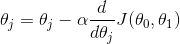


- The idea behind TIB is to sample bars whenever tick imbalances exceed our expectations.

- whe should determine the **tick index T** such that the accumulation of signed ticks exceeds a given threshold.
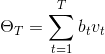
(이 뒤는 VIB/DIB설명과 동일)

- TIBs are produced more frequently under the presense of informed trading 

## 2.3.2.2 Volume/Dollar imbalance bars







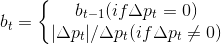







**step 1)**  

get b <sub>t</sub> {-1,1}    
 Given a sequence of N ticks {p[i], v[i] for i = 1,2...N    
  p[i] = price    
  v[i] = the number of securities traded(VIB) || the dollar amount exchanged (DIB)    
   
 we first compute change in price from tick to tick, and then define the sequence {b[i]} for i = 1,2....N  
 
 Δp[i] := p[i]-p[i-1]  
 
 if Δp[i] = 0:  
    b[i] := b[i-1]  
    
 else:    
    b[i] := abs(Δp[i])/Δp[i]
   
 **step 2)**  

compute the imbalance at **time T** defined as  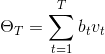

p<sub>t</sub> : price   
v<sub>t</sub> :  the number of securities traded(VIB) || the dollar amount exchanged (DIB)    
   
**step 3)**   

compute the expected value of T ewma of previous T values.  

**step 4)**  

compute the expected value of θ<sub>T</sub>(which is E<sub>0</sub>[ θ<sub>T</sub>]) as ewma of b<sub>t</sub>v<sub>t</sub> values.  

**step 5)**  

for each index:
 - compute |θ<sub>T</sub>| = E<sub>0</sub>[T] * |2v<sup>+</sup> - E<sub>0</sub>[v<sub>t</sub>]|  
 - if the condition is met capture the quantitiy of ticks  
 -reset tick count  
 -continue  
  




EWMA: Exponentially Weighted Moving Averages  
과거의 모든 데이터를 계산대상으로 하며 최근의 데이터에 더 높은 가중치를 둠.

In [18]:
data.head()

,date_time,price,volume,buy,sell,CumVol,MarketValue
0,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,1.0,266.200012
1,2018-11-21 09:00:00,266.200012,1.0,0.0,1.0,2.0,266.200012
2,2018-11-21 09:00:00,266.250000,21.0,21.0,0.0,23.0,5591.250000
3,2018-11-21 09:00:00,266.299988,1.0,1.0,0.0,24.0,266.299988
4,2018-11-21 09:00:00,266.350006,2.0,2.0,0.0,26.0,532.700012


In [36]:

#def numba_isclose(a,b,rel_tol = 1e-09, abs_tol = 0.0):
  #  return np.fabs(a-b) <= np.fmax(rel_tol*np.fmax(np.fabs(a),np.fabs(b)),abs_tol)

def bt(p0, p1,bs): #STEP 1
    if math.isclose((p1-p0),0.0,abs_tol = 0.001):
        b = bs[-1]
        return b
    else:
        b = np.abs(p1-p0)/(p1-p0)
        return b
    
def get_imbalance(t): # θt (imbalance at time t )
    bs = np.zeros_like(t) #크기를 튜플로 명시하지 않고 다른 배열과 같은 크기 배열 사용하고 싶을 떄(그냥 배열 만들기)
    for i in tqdm_notebook(np.arange(2,bs.shape[0])):# 리스트를 리턴하는 게 아니라, 행렬을 리턴
        t_bt = bt(t[i-1],t[i],bs[:i-1])
        bs[i-1] = t_bt
    return bs[:-1] #remove last value


In [117]:
dol_imb = get_imbalance(data.price.values)*data.volume.iloc[1:] #STEP 2





In [241]:
dol_imb.head()


1     0.0
2    21.0
3     1.0
4     2.0
5    10.0
Name: volume, dtype: float64

In [242]:
wndo = dol_imb.shape[0]//1000

E_bs = dol_imb.ewm(wndo).mean()

#E_T is Exponentially Weighted Moving Avg of index values
E_T = pd.Series(range(dol_imb.shape[0])).ewm(wndo).mean()

#index = dol_imb
E_bs.head()

1     0.000000
2    10.500999
3     7.333397
4     5.999667
5     6.800038
Name: volume, dtype: float64

In [122]:
dol_imb_result = pd.DataFrame().assign(bs = dol_imb).assign(E_T = E_T).assign(E_bs = E_bs).assign(absMul = lambda data: data.E_T*np.abs(data.E_bs)).assign(absTheta = dol_imb.cumsum().abs())


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000243F7534BA8>,
      dtype=object)

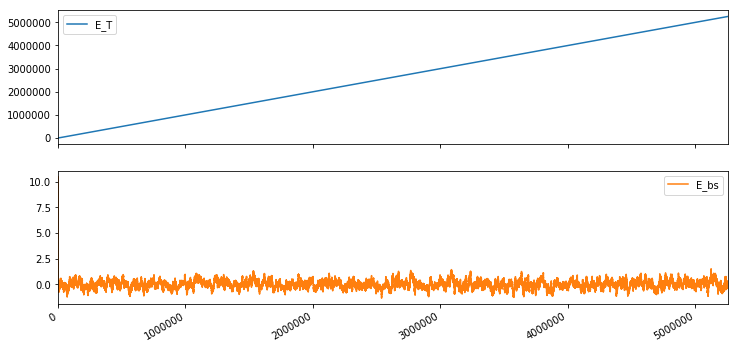

In [123]:
dol_imb_result[['E_T','E_bs']].plot(subplots = True,figsize = (12,6))

In [25]:
dol_imb_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256742 entries, 1 to 5256742
Data columns (total 5 columns):
bs          float64
E_T         float64
E_bs        float64
absMul      float64
absTheta    float64
dtypes: float64(5)
memory usage: 200.5 MB


In [26]:
display(dol_imb_result.describe()/1000)

,bs,E_T,E_bs,absMul,absTheta
count,5256.742000,5256.741000,5256.742000,5256.741000,5256.742000
mean,-0.000014,2623.123645,-0.000014,805.436885,50.096279
std,0.013418,1517.475639,0.000383,877.443350,36.587951
min,-0.500000,0.000500,-0.001355,0.000000,0.000000
25%,-0.002000,1308.930000,-0.000263,170.282265,19.932000
50%,-0.001000,2623.115000,-0.000018,501.125175,39.127000
75%,0.002000,3937.300000,0.000233,1113.204655,82.431000
max,0.587000,5251.485000,0.010501,7733.317892,125.764000


 we define VIB of DIB as a T*- contiguous subset of ticks such that the following condition is met:
    
    
  

In [182]:
def test_t_abs(absTheta,t,E_bs):
    """
    Bool function to test inequality
    *row is assumed to come from df.itertuples()
    -absTheta: float(), row.absTheta
    -t: pd.Timestamp()
    -E_bs: float(), row.E_bs
    """
    return (absTheta >= t*E_bs)

def agg_imbalance_bars(df):
    """
    Implements the accumulation logic
    """
    start = df.index[0]  
    bars = []
    for row in tqdm_notebook(df.itertuples()):
      #  print(row)
        t_abs = row.absTheta
        rowIdx = row.Index
        E_bs = row.E_bs
        
        t = df.loc[start:rowIdx].shape[0]
        if t<1: t=1 # if t lt 1 set equal to 1
        if test_t_abs(t_abs,t,E_bs):
            bars.append((start,rowIdx,t))
            start = rowIdx
    return bars

In [183]:
dol_imb_result.itertuples()

In [184]:
#absTheta = dol_imb.cumsum().abs()
bars = agg_imbalance_bars(dol_imb_result)


In [185]:
test_imb_bars = (pd.DataFrame(bars,columns=['start','stop','Ts']).drop_duplicates())

In [191]:
dvlambars = data.price.loc[test_imb_bars.stop].drop_duplicates().pct_change()
dvlambars.autocorr()

0.00240388341955973

# Exercises


all of the following data analysis are performed on KOSPI 200 data.

### 2.1.

1. Form tick, volume, and dollar bars

 * as mentioned above
 
 
2. Count the number of bars produced by tick, volume, and dollar bars on a weekly basis. Plot a time seiries of that bar count. What bar type produces the most stable weekly count? Why?


In [324]:


data_tick_vwap.index = pd.to_datetime(data_tick_vwap.date_time)
data_vol_vwap.index = pd.to_datetime(data_vol_vwap.date_time)
data_dol_vwap.index = pd.to_datetime(data_dol_vwap.date_time)


tick_count = data_tick_vwap['price'].pct_change().resample('1W', label='right').count()


volume_count = data_vol_vwap['price'].resample('1W', label='right').count()
dollar_count = data_dol_vwap['price'].resample('1W', label='right').count()

count_df = pd.concat([ tick_count, volume_count, dollar_count], axis=1)
count_df.columns = [ 'tick', 'volume', 'dollar']

In [ ]:
data_tick_vwap['price'].pct_change().resample('1W', label='right')

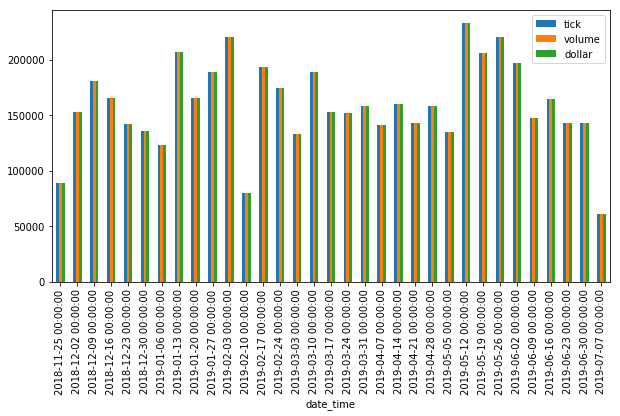

In [265]:
count_df.plot(kind='bar', figsize = [10,5])


In [317]:

tick_count.std()

38806.515247144955

In [287]:
volume_count.std()


38806.515247144955

In [288]:
# We cannot figure out what bar type produces the most stable weekly count..?
tick_count.std()

38806.515247144955

3.Compute serieal correlation of returns for the three bar types. What bar method has the lowest serial correlation?

* serial correlation(autocorrelation) : correlation between serial returns
(시간 또는 공간적으로 연속된 일련의 관측치들간에 존재하는 상관관계)
회귀분석에서 시계열의 관측값이 선행된 관측값에 의존하여 자기상관을 보일 때, 즉 관측값이 선행관측값들의 회귀관계를 갖는 현상을 autocorrelation이라고 한다.
일반적으로 자기회귀현상은 회귀계수의 효율성을 보장 못하기에 회귀분석은 자기회귀가 존재하지 않는다는 것이 전제되어야 한다(왜곡 방지)

* acf : autocorrelation function in python
https://datascienceschool.net/view-notebook/12c6c314797c4c438d06e5cf4d290840/

- 10T

In [13]:
#data_tick_vwap.set_index('index')
data_drp = data_tick_vwap.set_index('index').drop_duplicates(['grpId'],keep = 'last')
data_drp['price'].pct_change().autocorr()

-0.0069020611673073695

In [212]:
data_drp_v = data_vol_vwap.drop_duplicates(['grpId'],keep = 'last')
data_drp_v['price'].pct_change().autocorr()

-0.005350698642231118

In [252]:
data_drp_d = data_dol_vwap.drop_duplicates(['grpId'],keep = 'last')
data_drp_d['price'].pct_change().autocorr()



-0.00040415886705216455

4. Partition the bar series into monthly subsets. compute the variance of returns for every subset of every bar type. Compute the variance of those variances. What method exhibits the smallest variances of variances?



In [257]:
#Partition the bar series into monthly subsets.compute the variance of returns for every subset of every bar type.
tick_month = pd.DataFrame(data_drp).set_index('date_time').resample('M',label = 'left')
tick_m_pct = tick_month['price'].ohlc().pct_change()
#Compute the variance of those variances. 
tick_m_ret = tick_m_pct['close'].var()


vol_month = pd.DataFrame(data_drp_v).set_index('date_time').resample('W',label = 'left')
vol_m_pct = vol_month['price'].ohlc().pct_change()
vol_m_ret = vol_m_pct['close'].var()

dol_month = pd.DataFrame(data_drp_d).set_index('date_time').resample('W',label = 'left')
dol_m_pct = dol_month['price'].ohlc().pct_change()
dol_m_ret = dol_m_pct['close'].var()



In [258]:
#Compute the variance of those variances. 
ret = [tick_m_ret, vol_m_ret, dol_m_ret]
ret

[0.002938334556020005, 0.0003864459715377553, 0.00038908098321886427]

dollar bars exhibits the smallest var of vars.

5. Apply the Jarque-Bera normality test on returns from the three bar types. What bar type achieves the lowest test statistic?

 * the Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.


In [33]:
# 1 week
tick_ohlc = tick_month['price'].ohlc()
tick_ret = np.log(tick_ohlc['close']).diff().dropna()
stats.jarque_bera(tick_ohlc['close'])

(0.7415727430999782, 0.6901913703233922)

In [34]:
stats.jarque_bera(vol_m_pct['close'].dropna())

(0.2495552838163049, 0.8826931547302332)

In [259]:
stats.jarque_bera(dol_m_pct['close'].dropna())

(0.6649107372073904, 0.7171606760320643)

In [14]:
sns.displot(stats.jarque_bera(tick_ohlc['close'])[0])

AttributeError: module 'seaborn' has no attribute 'displot'

volume bars achieves the lowest statistic.



### 2.2

compute dollar bars and dollar imbalance bars. What bar type exhibits greater serial correlation?

In [253]:
data_drp_d['price'].pct_change().autocorr() # dollar bars

-0.00040415886705216455

In [239]:
dvlambars.autocorr() #dollar imbalance bars

0.00240388341955973

## CUSUM Filter


In [105]:
import itertools as it 
import numpy as np
import pandas as pd
from datetime import datetime
import time


#10T
h=0.005
tmp = np.log(data_time_group.price.close).diff().dropna()
# if (x+y)< h이면 max(x+y,0)를 구하는 거고 else이면 0
# 즉 (x+y)>=h일때 0
#근데 책에도 보면 S>= h일 때 event가 발생하는 거니까 여기서 0은 이벤트가 발생했으면 0으로 놓는다는 것
tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))
# (x+y) => h일떄  sq로 집어넣는거
s1 = [index for index, value in enumerate(tmp_p) if value ==0]
s2 = [index for index, value in enumerate(tmp_n) if value ==0]
#print(set(s1) & set(s2))

n = (set(s1) & set(s2))
len(n)

1205

In [110]:
threshold=0.005
t_events = []
s_pos = 0
s_neg = 0

    # log returns
diff = np.log(data_time_group.price.close).diff().fillna(0)
    # Get event time stamps for the entire series
for i in diff.index[1:]:
    pos = float(s_pos + diff.loc[i])
    neg = float(s_neg + diff.loc[i])
    s_pos = max(0.0, pos)
    s_neg = min(0.0, neg)

    if s_neg < -threshold:
        s_neg = 0
        t_events.append(i)

    elif s_pos > threshold:
        s_pos = 0
        t_events.append(i)

    # Return DatetimeIndex or list

event_timestamps = pd.DatetimeIndex(t_events)
    #return event_timestamps

len(event_timestamps)

289

In [109]:
diff.dropna()


date_time
2018-11-21 09:10:00    0.000000
2018-11-21 09:20:00   -0.001127
2018-11-21 09:30:00   -0.000564
2018-11-21 09:40:00   -0.000752
2018-11-21 09:50:00    0.000564
2018-11-21 10:00:00   -0.001129
2018-11-21 10:10:00    0.001505
2018-11-21 10:20:00    0.001315
2018-11-21 10:30:00    0.002438
2018-11-21 10:40:00   -0.000187
2018-11-21 10:50:00    0.000187
2018-11-21 11:00:00    0.001871
2018-11-21 11:10:00   -0.000374
2018-11-21 11:20:00   -0.000374
2018-11-21 11:30:00   -0.000374
2018-11-21 11:40:00    0.000374
2018-11-21 11:50:00    0.000935
2018-11-21 12:00:00    0.001121
2018-11-21 12:10:00    0.000933
2018-11-21 12:20:00    0.000560
2018-11-21 12:30:00   -0.000560
2018-11-21 12:40:00    0.000000
2018-11-21 12:50:00   -0.000187
2018-11-21 13:00:00    0.000932
2018-11-21 13:10:00   -0.000373
2018-11-21 13:20:00    0.000746
2018-11-21 13:30:00   -0.000186
2018-11-21 13:40:00    0.000559
2018-11-21 13:50:00    0.000186
2018-11-21 14:00:00   -0.001304
                         ...  

In [ ]:
def npMovingAverage(data, window=3):
    weights = np.ones(window) / window
    return np.convolve(data, weights, mode='valid')

def getDailityVol (
    df,
    col_close='close',
    col_dVol='dVol',
    span0 = 100
    ):
    df[col_dVol]=df[col_close].pct_change()
    df[col_dVol] = df[col_dVol].ewm(span=100).std()
    return df[col_dVol]

def CUSUM_dVol(
    df,
    col='close',
    window=20,
    h=0.05
   ):
    bar = df.drop(df.columns.difference([col]), axis=1)
    tmp = np.log(bar[col]).diff().fillna(0)
        
    ma = npMovingAverage(tmp,window)      
    tmp = tmp[window-1:]
    tmp = tmp - ma    
    
    dVol = getDailityVol(df,col_close='price')
    tmp_p = tmp - dVol
    tmp_n = tmp + dVol 
    
    tmp_p = list(it.accumulate(tmp_p, lambda x, y: max(x+y, 0) if (x+y) >= 0 else 0))
    tmp_n = list(it.accumulate(tmp_n, lambda x, y: min(x+y, 0) if (x+y) <= 0 else 0))
    
    s1 = [index for index, value in enumerate(tmp_p) if value !=0]
    s2 = [index for index, value in enumerate(tmp_n) if value !=0]
        
    s_p = bar.iloc[s1]
    s_n = bar.iloc[s2]    
    
    s_t = pd.concat([s_p,s_n],axis = 1,sort=True)
    s_t.columns = ['s_p','s_n']
    
    #s_t['s_t'] = s_t.apply(lambda x: x['s_n'] if pd.isna(x['s_p']) else x['s_p'],axis=1)
    
    return s_t